# Исследование исторических данных о продажах игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цели исследования:**
Выявление закономерностей, определяющих успешность игры.

**Описание данных:**
Датасет с информацией о компьютерных играх, выпущенных с 1980-го по 2016-й год: платформы, для которых они предназначены, жанр, рейтинг, продажи в различных регионах и т.д.

**План работы:**

1 ОТКРОЕМ ФАЙЛ С ДАННЫМИ И ИЗУЧИМ ОБЩУЮ ИНФОРМАЦИЮ

1.1 Импортируем библиотеки pandas, matplotlib и scipy, считаем данные из csv-файла в датафрейм, сохраним в переменную data и выведем ее на экран.

1.2 Выведем основную информацию о датафрейме.

2 ПРЕДОБРАБОТКА ДАННЫХ

2.1 Приведем к нижнему регистру названия столбцов.

2.2 Обработаем пропуски и преобразуем данные в нужные типы.

2.3 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

3 ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

3.1 Посмотрим, сколько игр выпускалось в разные годы.

3.2 Посмотрим, как менялись продажи по платформам.

3.3 Выберем актуальный период.

3.4 Изучим, какие платформы лидируют по продажам, растут или падают.

3.5 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишем результат.

3.6 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

3.7 Посмотрим на общее распределение игр по жанрам.

4 СОСТАВИМ ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ КАЖДОГО РЕГИОНА

4.1 Изучим самые популярные платформы (топ-5).

4.2 Изучим самые популярные жанры (топ-5).

4.3 Изучим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

5 ПРОВЕРКА ГИПОТЕЗ

ОБЩИЙ ВЫВОД

### Откроем файл с данными и изучим общую информацию.

**1.1 Импортируем библиотеки pandas, matplotlib и scipy, считаем данные из csv-файла в датафрейм, сохраним в переменную data и выведем ее на экран.**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats as st

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**1.2 Выведем основную информацию о датафрейме.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Предобработка данных

**2.1 Приведем к нижнему регистру названия столбцов.**

In [4]:
data.columns = data.columns.str.lower()

**2.2 Обработаем пропуски и преобразуем данные в нужные типы.**

In [5]:
# Заменим пропуски в столбцах name и genre на 'Unknown':

data['name'] = data['name'].fillna('Unknown')

In [6]:
data['genre'] = data['genre'].fillna('Unknown')

In [7]:
# Заменим пропуски в столбце year_of_release нулем:

data['year_of_release'] = data['year_of_release'].fillna(0)

In [8]:
# Заменим тип данных на int:

data['year_of_release'] = data['year_of_release'].astype(int)

In [9]:
# Заменим значения 'tbd' столбца user_score, поделив соответствующие значения
# столбца critic_score на десять:

data.loc[data['user_score'] == 'tbd' , 'user_score'] = data['critic_score'] / 10

In [10]:
# Заменим тип данных на float:

data['user_score'] = data['user_score'].astype(float)

**Вывод:**
В столбце year_of_release значения заменены целочисленными для ясности отображения и простоты дальнейшей работы с ними. Тип данных в столбце user_score заменен на float, т.к. в нем представлены вещественные числа.

**Вывод:**
Пропуски в столбцах name и genre заменены на 'Unknown' для возможности их отображения на графиках и в таблицах при дальнейшей работе с датасетом. Пропуски в столбце year_of_release заменены на ноль, чтобы иметь возможность изменить тип данных столбца. Пропуски в столбцах user_score, critic_score и rating оставлены, т.к. таких значений почти половина, и их замена синтетическими данными может сильно исказить статистику.

Пропуски в столбцах name, year_of_release и genre могли возникнуть из-за технической ошибки. В столбцах user_score и critic_score - потому что не все пользователи или критики проставили свои оценки. Пропуски в столбце rating могут быть связаны с тем, что не всем играм был присвоен рейтинг по данной системе, или также с технической ошибкой.

**Вывод:**
Значение 'tbd' в столбце user_score может значить 'to be delivered', то есть, что оценка пользователя будет добавлена в датасет позже. Если взглянуть на отношение между значениями этого столбца и столбца critic_score, то можно заметить, что оно часто составляет примерно один к десяти. Значения 'tbd' заменены исходя из этого.

**2.3 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [11]:
data['summary_sales'] = data['na_sales'] + data['jp_sales'] + data['eu_sales'] + data['other_sales']

### Исследовательский анализ данных

**3.1 Посмотрим, сколько игр выпускалось в разные годы.**

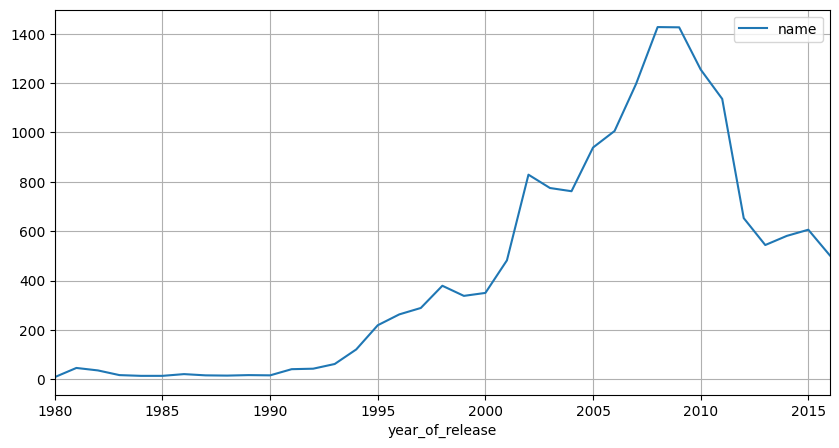

In [12]:
# Создадим сводную таблицу и определим, сколько игр выпускалось в разные годы;
# Построим график:

data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(xlim=(1980,2016), figsize=(10,5), grid=True);

**3.2	Посмотрим, как менялись продажи по платформам.**

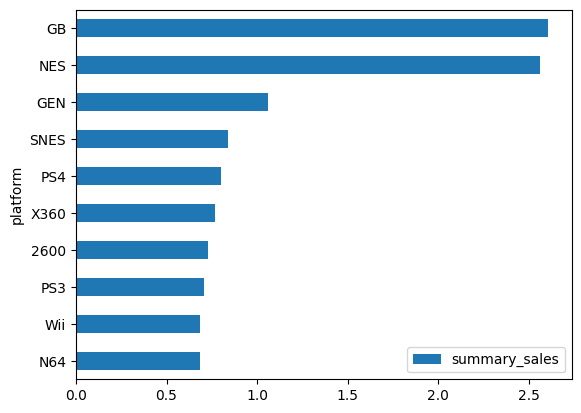

In [13]:
# Создадим сводную таблицу и определим средние суммарные продажи для каждой платформы:

data.pivot_table(index='platform', values='summary_sales', aggfunc='mean').sort_values(by='summary_sales', ascending=True).tail(10).plot(kind='barh');

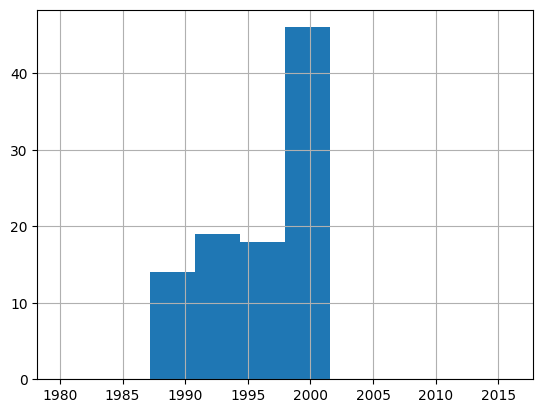

In [14]:
# Построим распределение по годам для лидирующих платформ:

data[(data['platform'] == 'GB')]['year_of_release'].hist(range=(1980,2016));

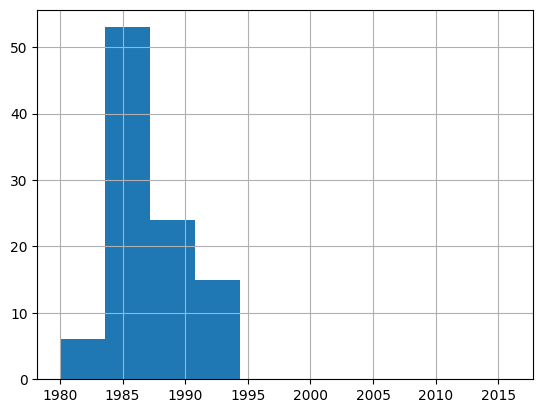

In [15]:
data[(data['platform'] == 'NES')]['year_of_release'].hist(range=(1980,2016));

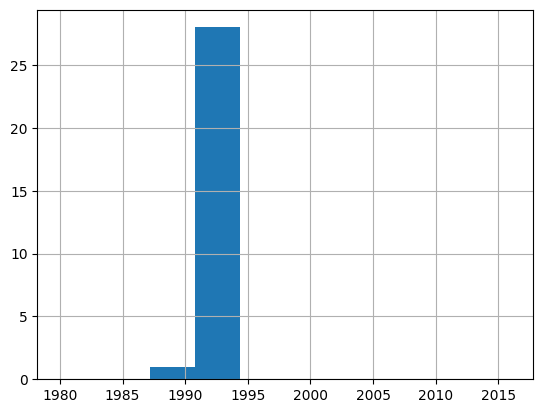

In [16]:
data[(data['platform'] == 'GEN')]['year_of_release'].hist(range=(1980,2016));

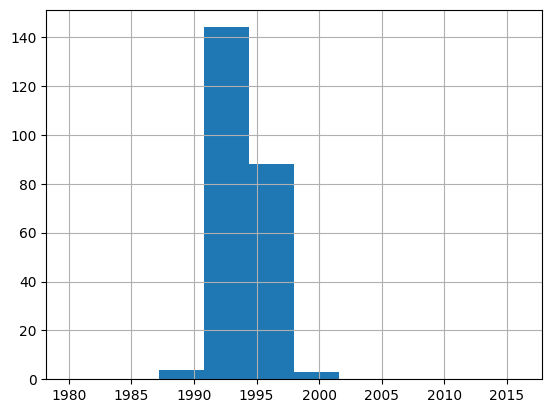

In [17]:
data[(data['platform'] == 'SNES')]['year_of_release'].hist(range=(1980,2016));

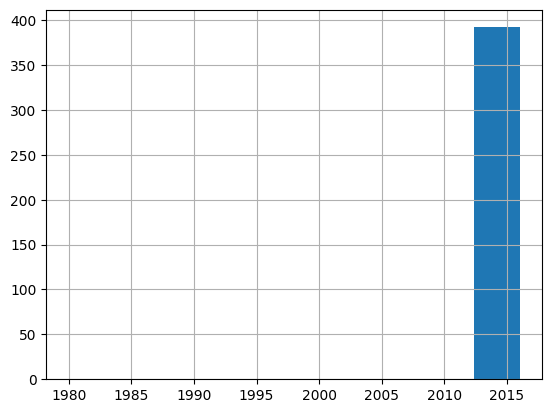

In [18]:
data[(data['platform'] == 'PS4')]['year_of_release'].hist(range=(1980,2016));

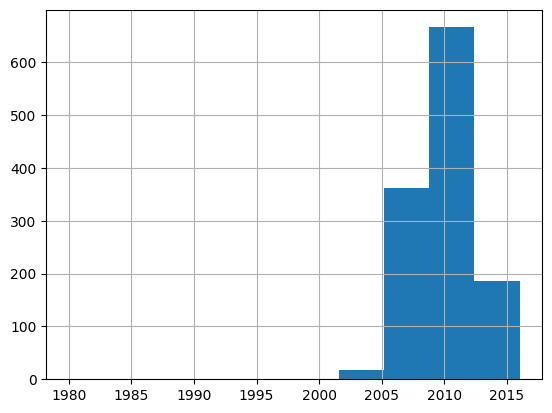

In [19]:
data[(data['platform'] == 'X360')]['year_of_release'].hist(range=(1980,2016));

**Вывод:**
Из графика зависимости количества выпущенных игр по годам заметно, что резкий бум игр начинается примерно с 2000-го года. В свою очередь, на примере гистограмм для платформ можно заметить, что средняя продолжительность "жизни" платформы составляет около десяти лет. Для наших же нужд за актуальный период можно принять года с 2013-го по 2015-й. 2016-й год опустим, так как он может содержать неполные данные.

**3.3 Выберем актуальный период.**

In [20]:
# Оставим в датасете только игры, выпущенные с 2013 по 2015-й год:

data = data[(data['year_of_release'] >= 2013) & (data['year_of_release'] < 2016)]

**3.4 Изучим, какие платформы лидируют по продажам, растут или падают.**

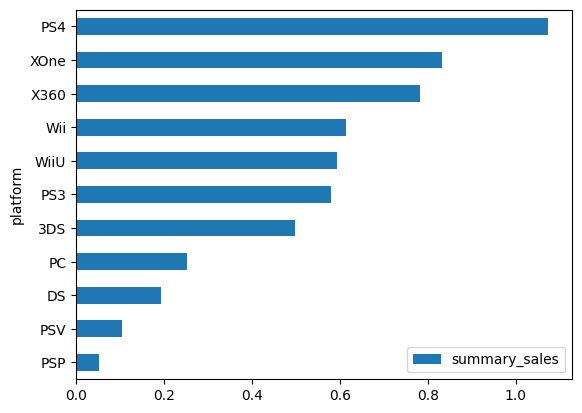

In [21]:
# Создадим сводную таблицу и определим суммарные продажи для каждой платформы в обновленном датасете:

data.pivot_table(index='platform', values='summary_sales', aggfunc='mean').sort_values(by='summary_sales', ascending=True).plot(kind='barh');

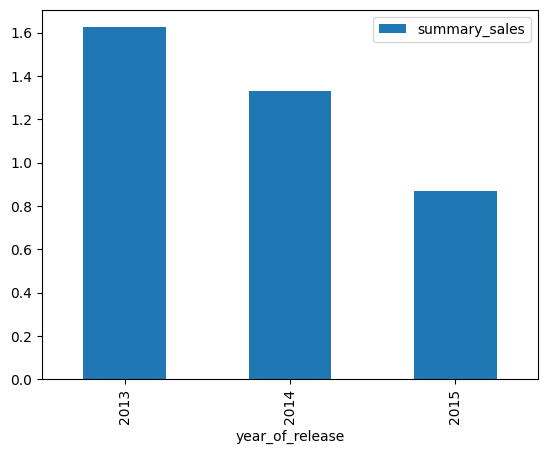

In [22]:
# Построим столбчатые диаграммы суммарных продаж по годам для каждой из платформ:

data[(data['platform'] == 'PS4')].pivot_table(index='year_of_release', values='summary_sales').plot(kind='bar');

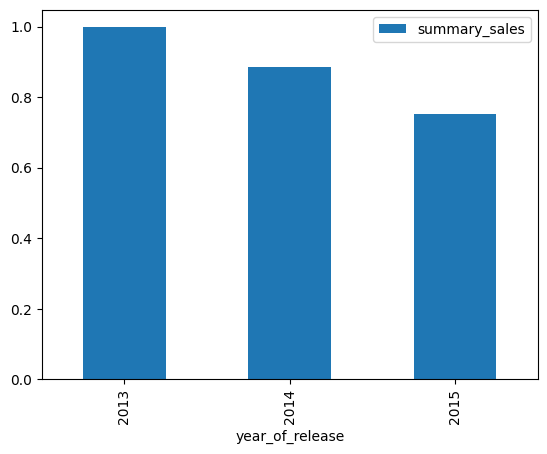

In [23]:
data[(data['platform'] == 'XOne')].pivot_table(index='year_of_release', values='summary_sales').plot(kind='bar');

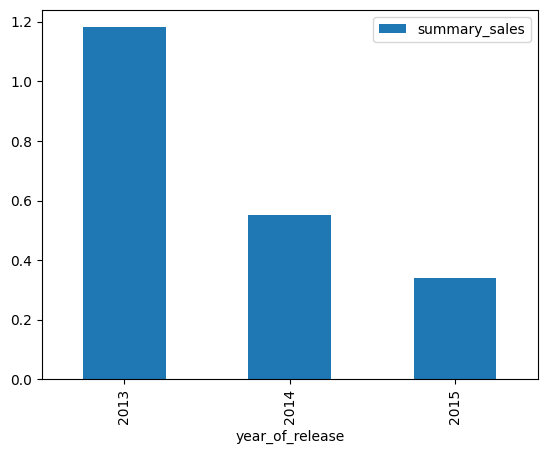

In [24]:
data[(data['platform'] == 'X360')].pivot_table(index='year_of_release', values='summary_sales').plot(kind='bar');

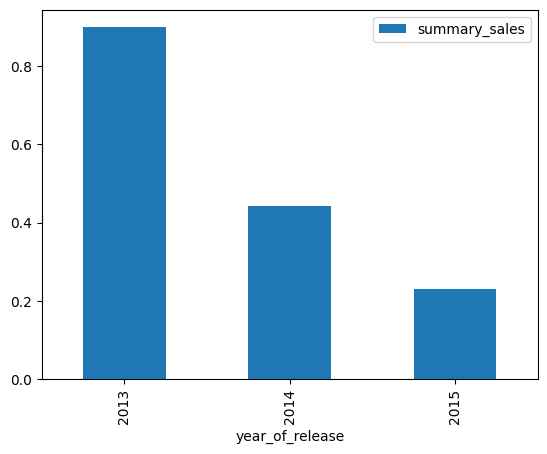

In [25]:
data[(data['platform'] == 'PS3')].pivot_table(index='year_of_release', values='summary_sales').plot(kind='bar');

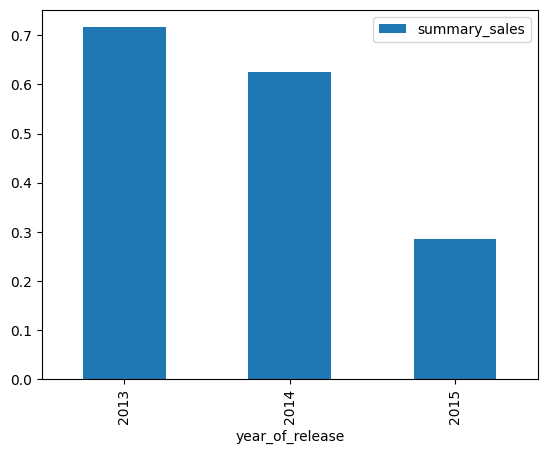

In [26]:
data[(data['platform'] == 'Wii')].pivot_table(index='year_of_release', values='summary_sales').plot(kind='bar');

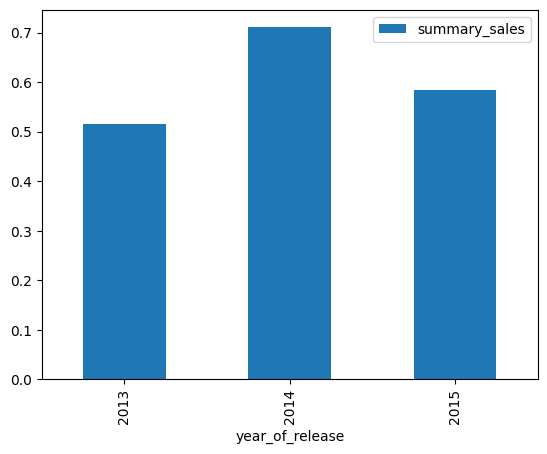

In [27]:
data[(data['platform'] == 'WiiU')].pivot_table(index='year_of_release', values='summary_sales').plot(kind='bar');

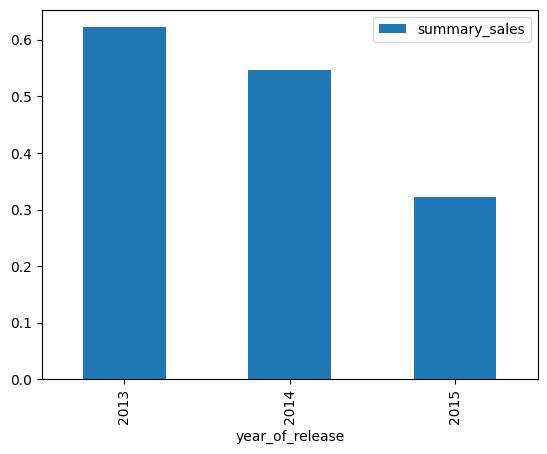

In [28]:
data[(data['platform'] == '3DS')].pivot_table(index='year_of_release', values='summary_sales').plot(kind='bar');

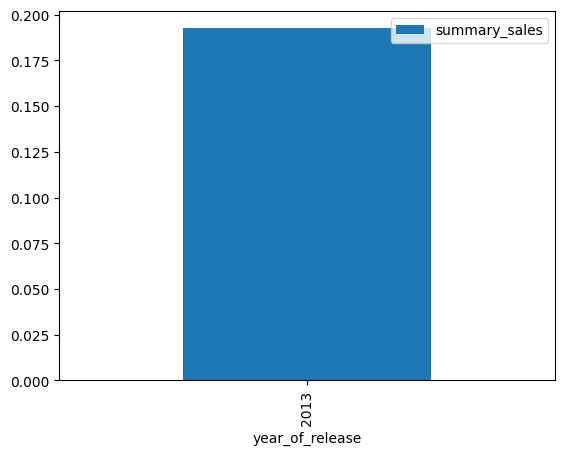

In [29]:
data[(data['platform'] == 'DS')].pivot_table(index='year_of_release', values='summary_sales').plot(kind='bar');

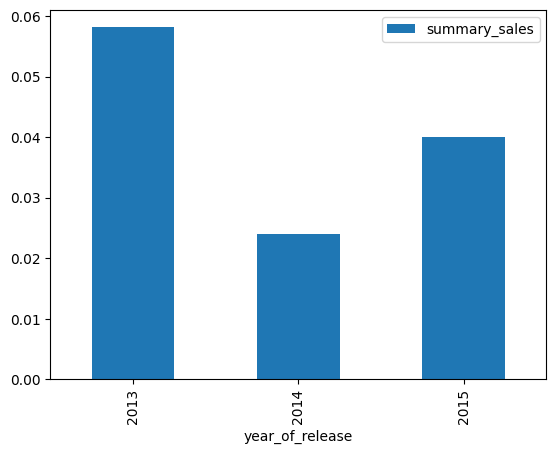

In [30]:
data[(data['platform'] == 'PSP')].pivot_table(index='year_of_release', values='summary_sales').plot(kind='bar');

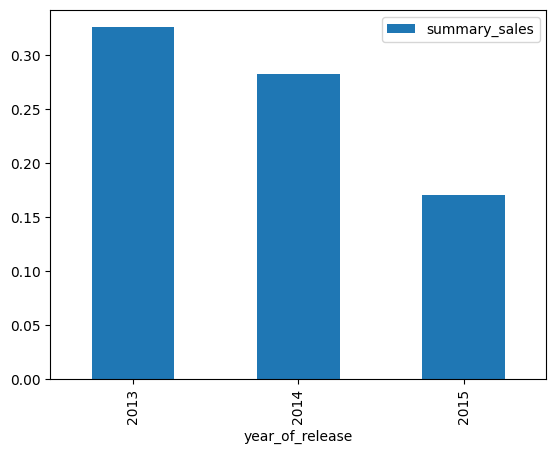

In [31]:
data[(data['platform'] == 'PC')].pivot_table(index='year_of_release', values='summary_sales').plot(kind='bar');

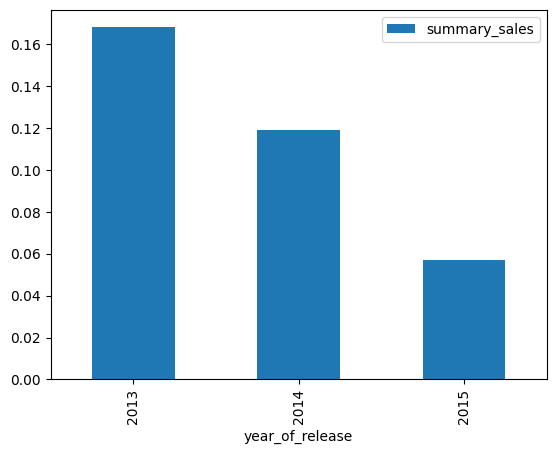

In [32]:
data[(data['platform'] == 'PSV')].pivot_table(index='year_of_release', values='summary_sales').plot(kind='bar');

**Вывод:**
Абсолютными лидерами продаж являются PS4 и XOne. На третьем месте расположилась X360. Девять из одиннадцати платформ, сохраняющие стабильные продажи к 2015-му году демонстрируют снижение их количества в сравнении с предыдущим годом. Единственная платформа, показавшая прирост - это PSP. Потенциально прибыльными платформами можно считать PS4 и XOne, за 2015-й год проданные в количестве около восьмисот тысяч копий; а также, X360.

**3.5 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишем результат.**

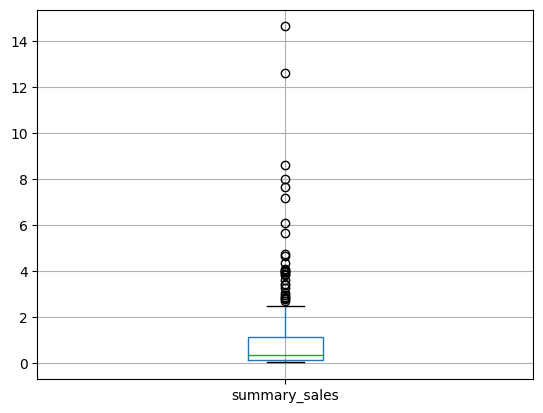

In [33]:
data[(data['platform'] == 'PS4')].boxplot(column='summary_sales')
plt.show()

In [34]:
data[(data['platform'] == 'PS4')]['summary_sales'].describe()

count    228.000000
mean       1.074079
std        1.899788
min        0.010000
25%        0.097500
50%        0.310000
75%        1.105000
max       14.630000
Name: summary_sales, dtype: float64

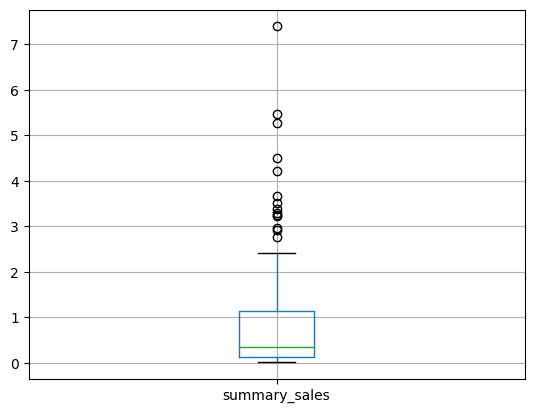

In [35]:
data[(data['platform'] == 'XOne')].boxplot(column='summary_sales')
plt.show()

In [36]:
data[(data['platform'] == 'XOne')]['summary_sales'].describe()

count    160.000000
mean       0.832313
std        1.182243
min        0.010000
25%        0.130000
50%        0.350000
75%        1.137500
max        7.390000
Name: summary_sales, dtype: float64

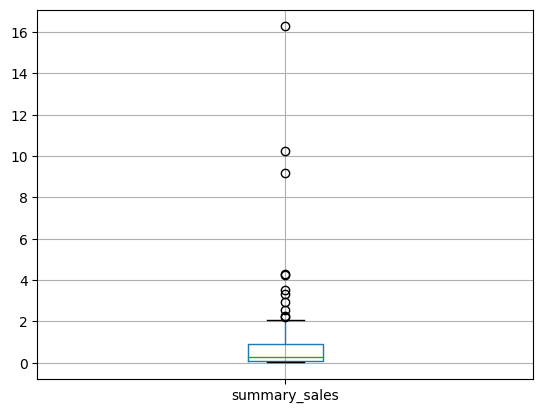

In [37]:
data[(data['platform'] == 'X360')].boxplot(column='summary_sales')
plt.show()

In [38]:
data[(data['platform'] == 'X360')]['summary_sales'].describe()

count    173.000000
mean       0.781965
std        1.715684
min        0.010000
25%        0.090000
50%        0.290000
75%        0.890000
max       16.270000
Name: summary_sales, dtype: float64

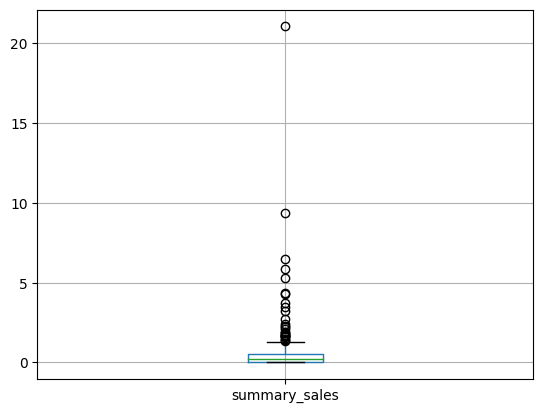

In [39]:
data[(data['platform'] == 'PS3')].boxplot(column='summary_sales')
plt.show()

In [40]:
data[(data['platform'] == 'PS3')]['summary_sales'].describe()

count    307.000000
mean       0.579251
std        1.530432
min        0.010000
25%        0.050000
50%        0.190000
75%        0.560000
max       21.050000
Name: summary_sales, dtype: float64

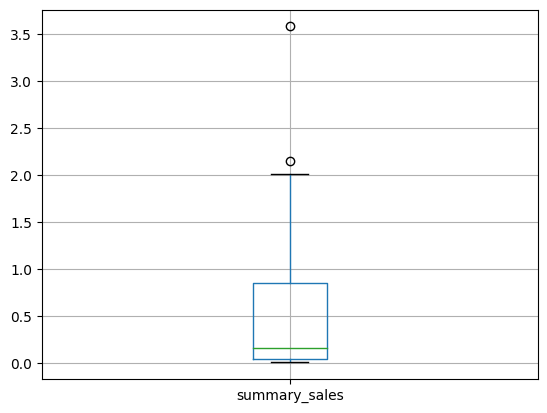

In [41]:
data[(data['platform'] == 'Wii')].boxplot(column='summary_sales')
plt.show()

In [42]:
data[(data['platform'] == 'Wii')]['summary_sales'].describe()

count    22.000000
mean      0.612727
std       0.932412
min       0.010000
25%       0.042500
50%       0.165000
75%       0.852500
max       3.580000
Name: summary_sales, dtype: float64

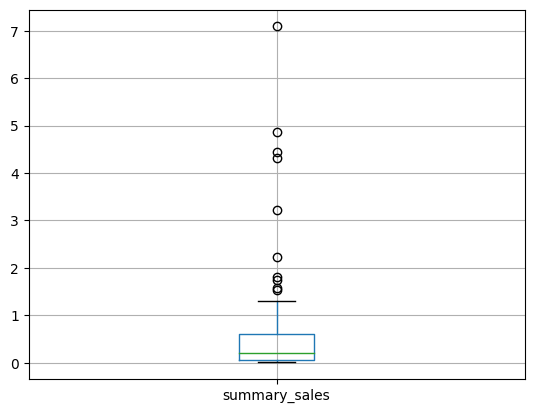

In [43]:
data[(data['platform'] == 'WiiU')].boxplot(column='summary_sales')
plt.show()

In [44]:
data[(data['platform'] == 'WiiU')]['summary_sales'].describe()

count    101.000000
mean       0.594356
std        1.098038
min        0.010000
25%        0.060000
50%        0.200000
75%        0.600000
max        7.090000
Name: summary_sales, dtype: float64

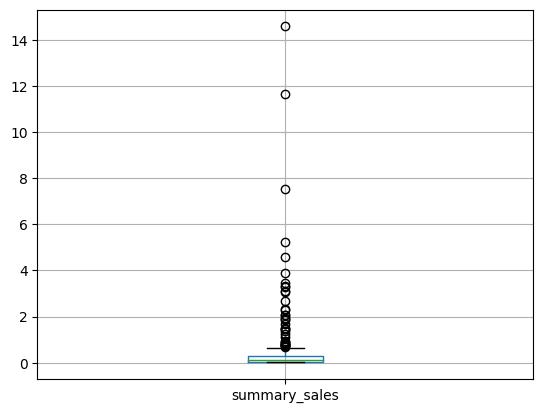

In [45]:
data[(data['platform'] == '3DS')].boxplot(column='summary_sales')
plt.show()

In [46]:
data[(data['platform'] == '3DS')]['summary_sales'].describe()

count    257.000000
mean       0.498482
std        1.431660
min        0.010000
25%        0.040000
50%        0.100000
75%        0.290000
max       14.600000
Name: summary_sales, dtype: float64

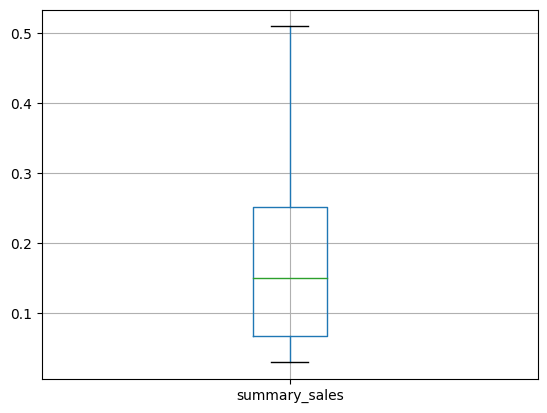

In [47]:
data[(data['platform'] == 'DS')].boxplot(column='summary_sales')
plt.show()

In [48]:
data[(data['platform'] == 'DS')]['summary_sales'].describe()

count    8.000000
mean     0.192500
std      0.172026
min      0.030000
25%      0.067500
50%      0.150000
75%      0.252500
max      0.510000
Name: summary_sales, dtype: float64

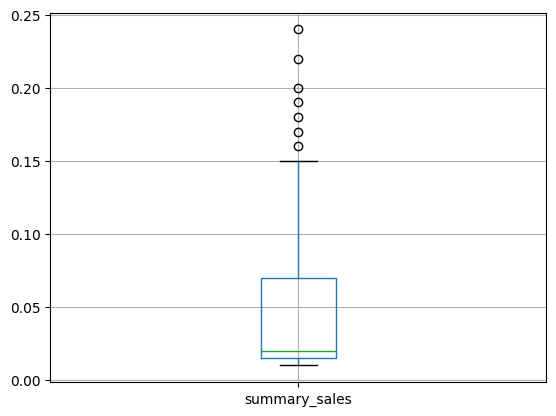

In [49]:
data[(data['platform'] == 'PSP')].boxplot(column='summary_sales')
plt.show()

In [50]:
data[(data['platform'] == 'PSP')]['summary_sales'].describe()

count    67.000000
mean      0.052239
std       0.059768
min       0.010000
25%       0.015000
50%       0.020000
75%       0.070000
max       0.240000
Name: summary_sales, dtype: float64

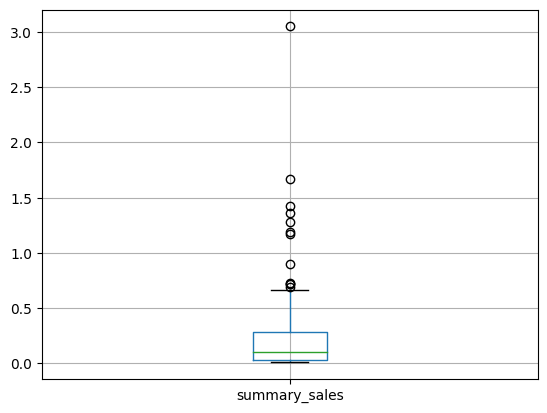

In [51]:
data[(data['platform'] == 'PC')].boxplot(column='summary_sales')
plt.show()

In [52]:
data[(data['platform'] == 'PC')]['summary_sales'].describe()

count    135.000000
mean       0.253185
std        0.399785
min        0.010000
25%        0.030000
50%        0.100000
75%        0.285000
max        3.050000
Name: summary_sales, dtype: float64

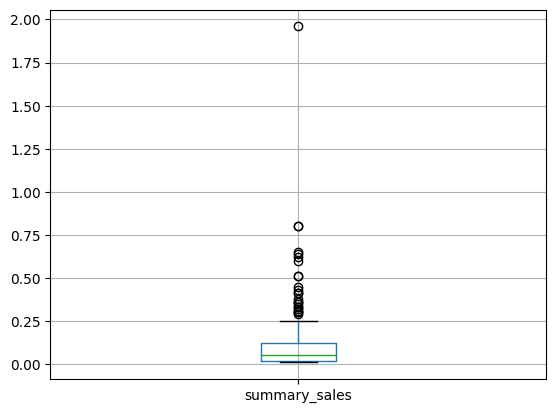

In [53]:
data[(data['platform'] == 'PSV')].boxplot(column='summary_sales')
plt.show()

In [54]:
data[(data['platform'] == 'PSV')]['summary_sales'].describe()

count    273.000000
mean       0.105275
std        0.171310
min        0.010000
25%        0.020000
50%        0.050000
75%        0.120000
max        1.960000
Name: summary_sales, dtype: float64

**Вывод:**
Медианное значение суммарных продаж для PS4 составляет 0.31 млн, а среднее - 1.07 млн. Выборка содержит большое количество выбросов. В случае XOne медиана равна 0.35 млн, а среднее - 0.83 млн. Выбросов также довольно много. Для X360 медиана составляет 0.29, среднее - 0.78 млн. Выбросы тоже присутсвуют, но в чуть меньшем количестве. Межквартильный размах у PS4 и XOne около единицы, а у X360 - 0.8. Самое большое стандартное отклонение, 1.9, у PS4.

**3.6 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

In [55]:
# Создадим датасет, содержащий данные только по PS4:

data_ps4 = data[(data['platform'] == 'PS4')]

In [56]:
# Выведем его на экран:

data_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


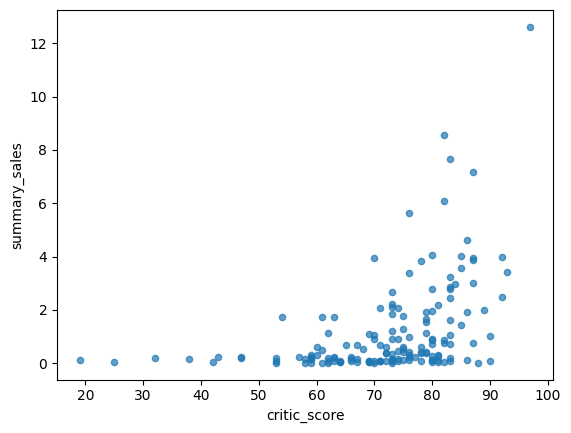

In [57]:
# Построим диаграммы рассеяния между отзывами и продажами:

data_ps4.plot(x='critic_score', y='summary_sales', kind='scatter', alpha=0.7);

In [58]:
# И определим коэффициенты корреляции:

round(data_ps4['summary_sales'].corr(data_ps4['critic_score']), 2)

0.43

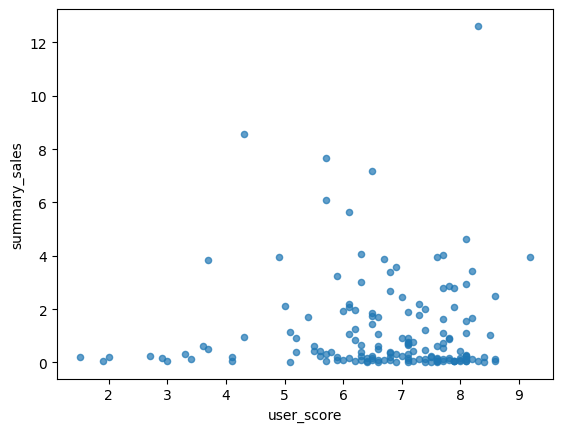

In [59]:
data_ps4.plot(x='user_score', y='summary_sales', kind='scatter', alpha=0.7);

In [60]:
round(data_ps4['summary_sales'].corr(data_ps4['user_score']), 2)

0.02

In [61]:
data_xone = data[(data['platform'] == 'XOne')]

In [62]:
data_xone.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


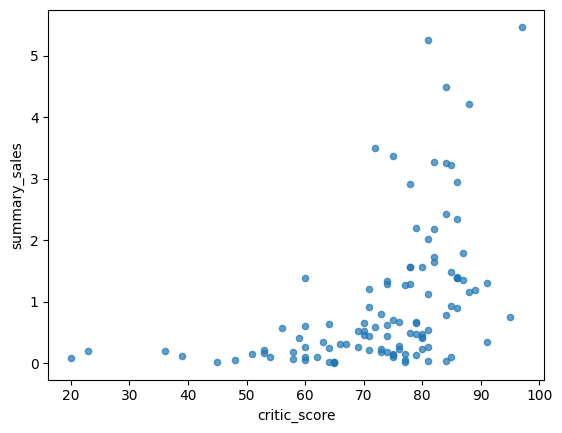

In [63]:
data_xone.plot(x='critic_score', y='summary_sales', kind='scatter', alpha=0.7);

In [64]:
round(data_xone['summary_sales'].corr(data_xone['critic_score']), 2)

0.46

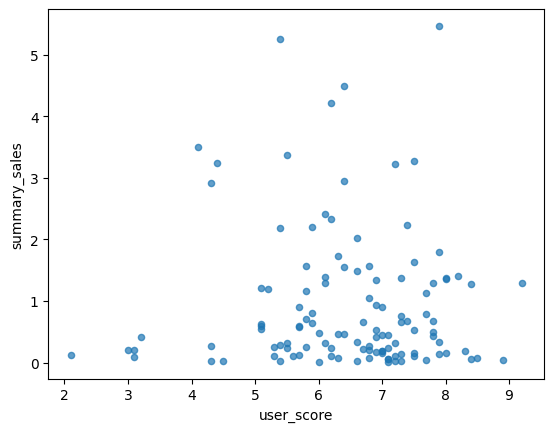

In [65]:
data_xone.plot(x='user_score', y='summary_sales', kind='scatter', alpha=0.7);

In [66]:
round(data_xone['summary_sales'].corr(data_xone['user_score']), 2)

-0.03

In [67]:
data_x360 = data[(data['platform'] == 'X360')]

In [68]:
data_x360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M,4.28
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22


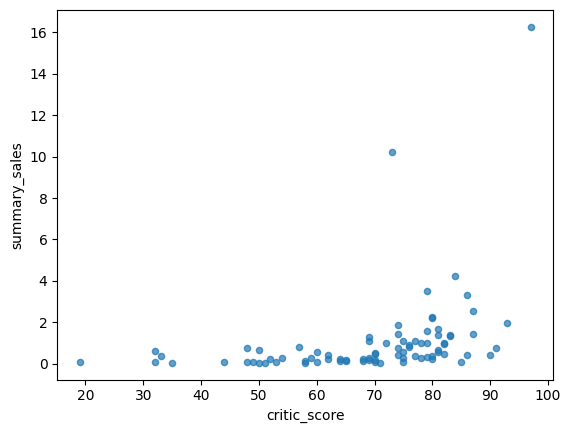

In [69]:
data_x360.plot(x='critic_score', y='summary_sales', kind='scatter', alpha=0.7);

In [70]:
round(data_x360['summary_sales'].corr(data_x360['critic_score']), 2)

0.35

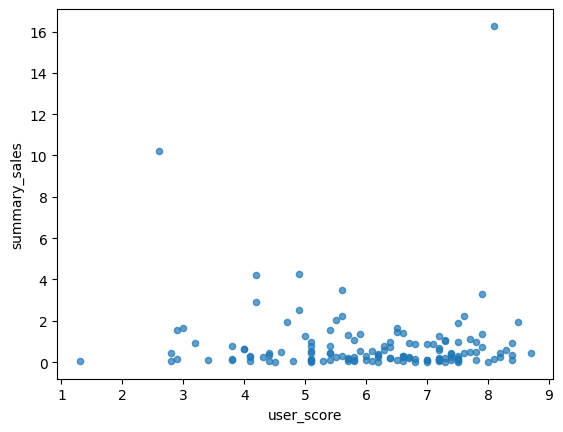

In [71]:
data_x360.plot(x='user_score', y='summary_sales', kind='scatter', alpha=0.7);

In [72]:
round(data_x360['summary_sales'].corr(data_x360['user_score']), 2)

-0.03

**Вывод:**
Исходя из полученных диаграмм и коэффициентов корреляции, можно сделать вывод, что пользовательская оценка практически не влияет на продажи. В свою очередь, коэффициент в диапазоне от 0.35 до 0.46 показывает, что определенная корреляция между оценками критиков и продажами существует, но она не так высока, как можно было бы предположить. По всей видимости, у данной связи более сложный, не линейный характер, и на нее оказывают влияние посторонние факторы.

**Вывод:**
Почти поголовное падение продаж за 2015-й год среди выбранных платформ может свидетельствовать о снижении уровня средней оценки критиков, что, в свою очередь, может являться признаком общего ухудшения качества игр, и, как следствие, понижения общей удовлетворенности среди пользователей.

**3.7 Посмотрим на общее распределение игр по жанрам.**

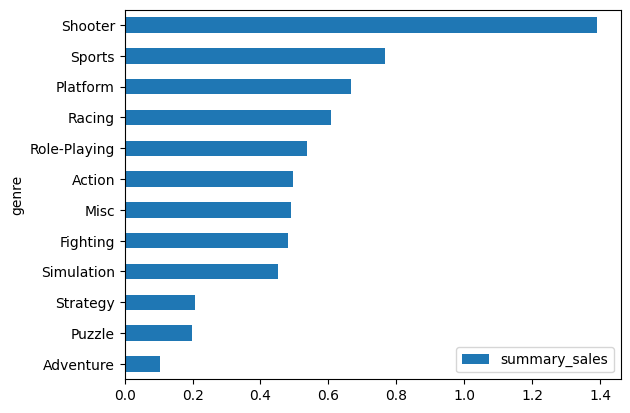

In [73]:
# Создадим сводную таблицу средних суммарных продаж по жанрам и построим столбчатую диаграмму:

data.pivot_table(index='genre', values='summary_sales', aggfunc='mean').sort_values(by='summary_sales', ascending=True).plot(kind='barh');

**Вывод:**
Самыми прибыльными жанрами являются шутеры, платформеры и спортивные игры. Отличительной их чертой является игровой процесс, не требующий какой-либо подготовки или больших интеллектуальных затрат. А наименьшая прибыль у приключенческого жанра.

### Составим портрет пользователя каждого региона

**4.1 Изучим самые популярные платформы (топ-5).**

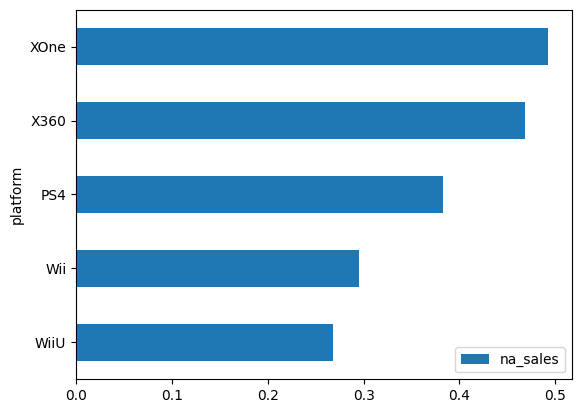

In [74]:
# Создадим сводные таблицы региональных продаж по платформам и построим столбчатые диаграммы
# для пяти платформ с наибольшими значениями:

data.pivot_table(index='platform', values='na_sales').sort_values(by='na_sales', ascending=True).tail().plot(kind='barh');

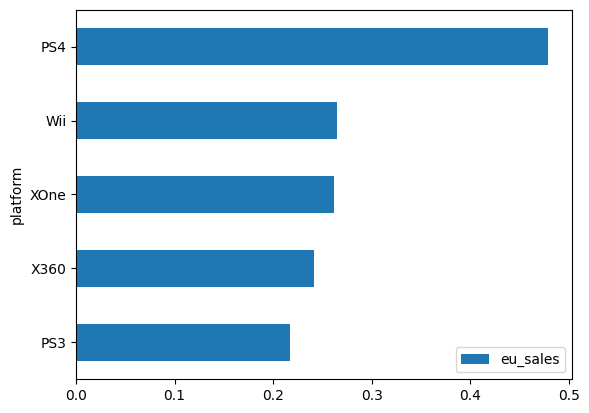

In [75]:
data.pivot_table(index='platform', values='eu_sales').sort_values(by='eu_sales', ascending=True).tail().plot(kind='barh');

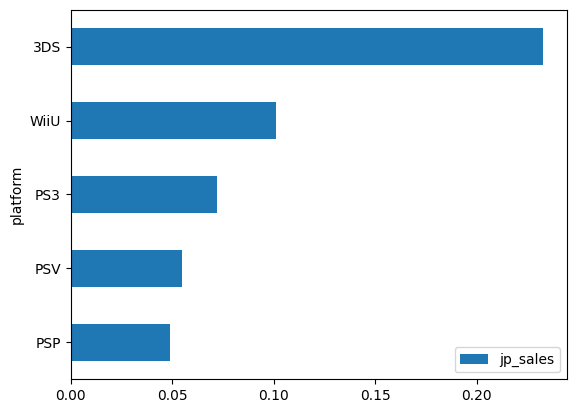

In [76]:
data.pivot_table(index='platform', values='jp_sales').sort_values(by='jp_sales', ascending=True).tail().plot(kind='barh');

**Вывод:**
В Северной Америке самыми популярными платформами являются XOne и, с совсем небольшим отставанием - X360. Третье место, с продажами на 20% меньше, занимает PS4. На четвертом и пятом местах - Wii и WiiU.

В Евросоюзе бесспорным лидером является PS4. XOne и X360 смещаются на третье и четвертое места, соответственно. Их продажи почти вдвое ниже. Wii оказывается на втором месте. А место WiiU в пятерке лидеров занимает приставка PS3 - у нее пятое место.

В Японии картина совсем иная: первое место у не встречавшейся ранее платформы 3DS. На втором месте, с в 2.5 раза более низкими показателями, расположилась WiiU. Следом идут PS3, PSV и PSP.

**4.2 Изучим самые популярные жанры (топ-5).**

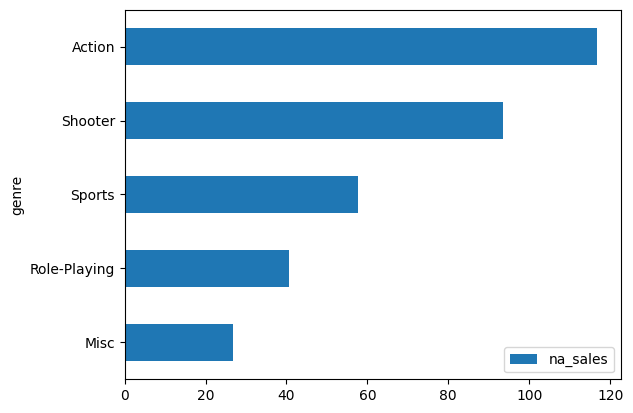

In [77]:
# Создадим сводные таблицы региональных продаж по жанрам и построим столбчатые диаграммы
# для пяти жанров с наибольшими значениями:

data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=True).tail().plot(kind='barh');

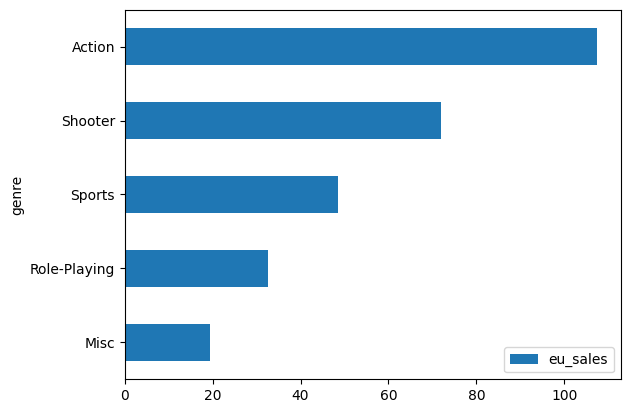

In [78]:
data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=True).tail().plot(kind='barh');

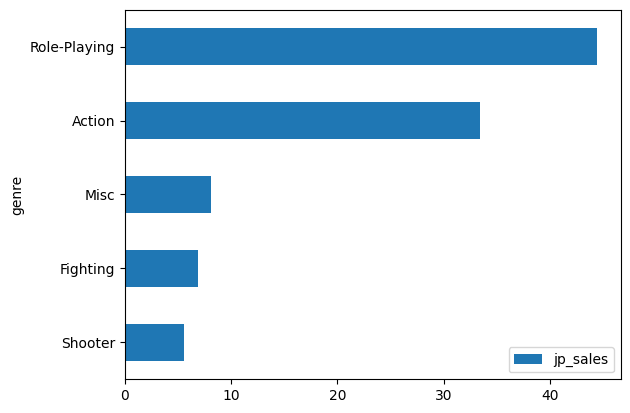

In [79]:
data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=True).tail().plot(kind='barh');

**Вывод:**
Топ-5 жанров в Северной Америке и Евросоюзе выглядит следующим образом: Action, Shooter, Sports, Role-Playing, Misc.

В Японии все вновь совсем по-другому: первое место с большим отрывом занимают ролевые игры. За ними следуют экшн-игры - их продажи примерно на 20% ниже. На третьем месте находится категория "Разное". Четвертую и пятую позиции делят файтинги и шутеры.

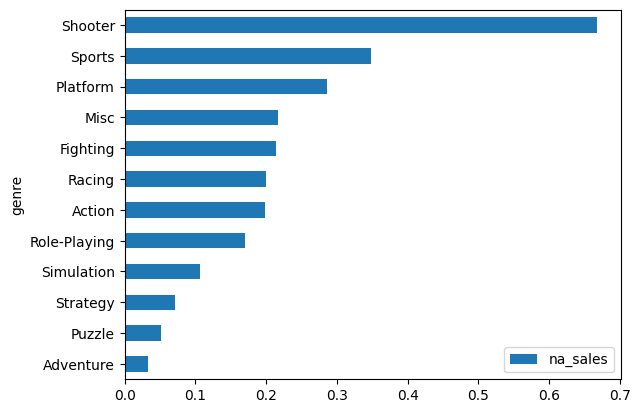

In [80]:
data.pivot_table(index='genre', values='na_sales').sort_values(by='na_sales', ascending=True).plot(kind='barh');

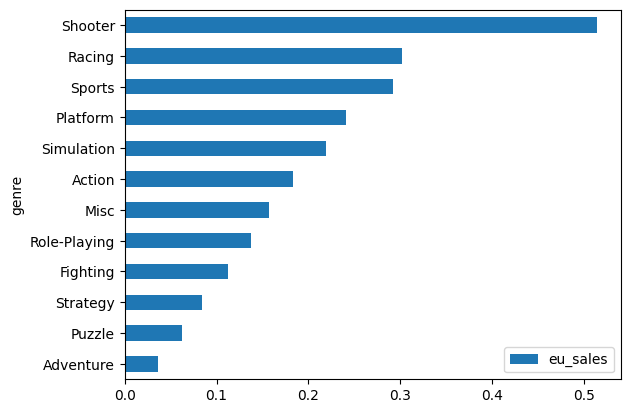

In [81]:
data.pivot_table(index='genre', values='eu_sales').sort_values(by='eu_sales', ascending=True).plot(kind='barh');

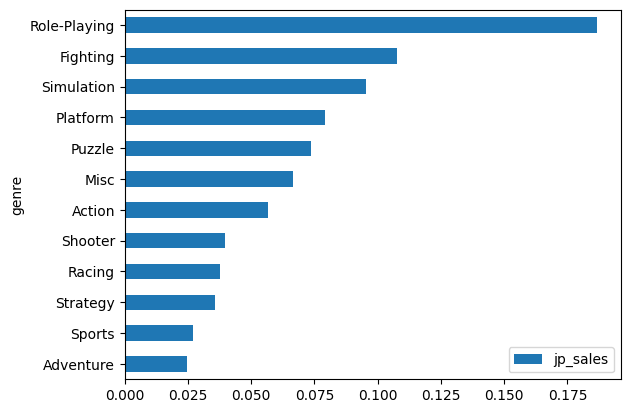

In [82]:
data.pivot_table(index='genre', values='jp_sales').sort_values(by='jp_sales', ascending=True).plot(kind='barh');

**4.3 Изучим, влияет ли рейтинг ESRB на продажи в отдельном регионе.**

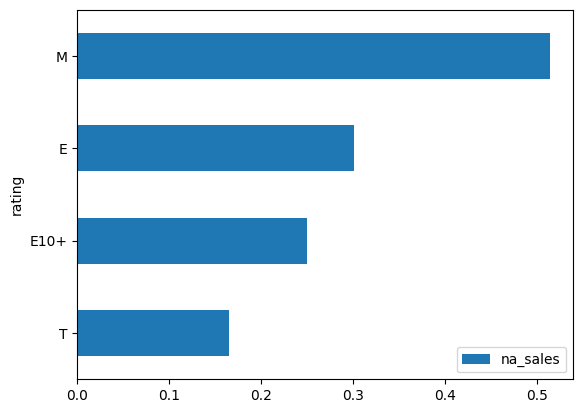

In [83]:
# Создадим сводные таблицы региональных продаж по рейтингу и построим столбчатые диаграммы
# для рейтингов с наибольшими значениями:

data.pivot_table(index='rating', values='na_sales').sort_values(by='na_sales', ascending=True).tail().plot(kind='barh');

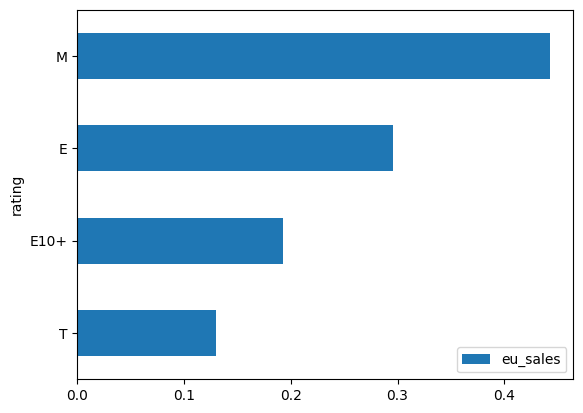

In [84]:
data.pivot_table(index='rating', values='eu_sales').sort_values(by='eu_sales', ascending=True).tail().plot(kind='barh');

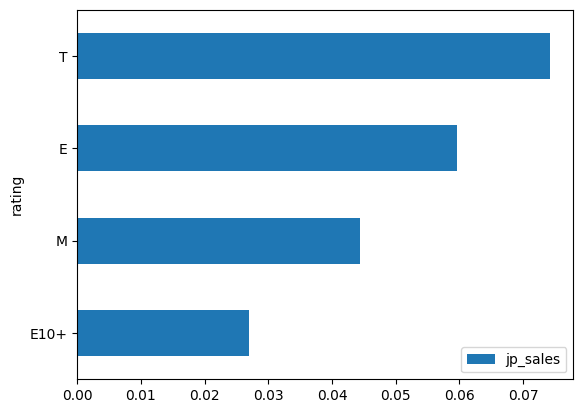

In [85]:
data.pivot_table(index='rating', values='jp_sales').sort_values(by='jp_sales', ascending=True).tail().plot(kind='barh');

**Вывод:**
В Северной Америке и в Евросоюзе абсолютным лидером продаж являются игры 17+. Второе место, с в два раза меньшими продажами занимают игры для всех возрастов. Третье - категория 10+. На четвертой позиции - игры для подростков.

В Японии, в очередной раз, все совсем по-другому. Продажи игр 17+ лишь на третьем месте. Первое место занимают игры для подростков. Второе - для всех возрастов. На четвертом - категория 10+.

### Проверка гипотез

In [86]:
# Удалим все строки с пропущенными значениями столбца user_score и сохраним в data_user_score:

data_user_score = data.dropna(subset=['user_score'])

In [87]:
# Выведем новый датасет на экран:

data_user_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36


**5.1 Проверка гипотезы:**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

H_0: Рейтинги (user_score) платформы Xbox One = рейтинги (user_score) платформы PC

H_1: Рейтинги (user_score) платформы Xbox One ≠ рейтинги (user_score) платформы PC

alpha = 0.05

In [88]:
# Создадим таблицу data_xbox_one, в которой будут только строки платформы XOne:
data_xbox_one = data_user_score[data_user_score['platform'] == 'XOne']
# Создадим переменную sample1 со значениями столбца user_score:
sample1 = data_xbox_one['user_score']
# Создадим таблицу data_pc, в которой будут только строки платформы PC:
data_pc = data_user_score[data_user_score['platform'] == 'PC']
# Создадим переменную sample2 со значениями столбца user_score:
sample2 = data_pc['user_score']
# Проверим гипотезу о равенстве среднего двух генеральных совокупностей:
results = st.ttest_ind(sample1, sample2, equal_var=False)
# Зададим значение уровня значимости:
alpha = 0.05
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


0.32558718343745463
Не получилось отвергнуть нулевую гипотезу


**Вывод:**
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**5.2 Проверка гипотезы:**

Средние пользовательские рейтинги жанров Action и Sports разные:

H_0: Рейтинги (user_score) жанра Action = рейтинги (user_score) жанра Sports

H_1: Рейтинги (user_score) жанра Action ≠ рейтинги (user_score) жанра Sports

alpha = 0.05

In [89]:
# Создадим таблицу data_xbox_one, в которой будут только строки жанра Action:
data_xbox_one = data_user_score[data_user_score['genre'] == 'Action']
sample3 = data_xbox_one['user_score']
# Создадим таблицу data_pc, в которой будут только строки жанра Sports:
data_pc = data_user_score[data_user_score['genre'] == 'Sports']
sample4 = data_pc['user_score']
results = st.ttest_ind(sample3, sample4, equal_var=False)
alpha = 0.05
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.3023203005553856e-19
Отвергаем нулевую гипотезу


**Вывод:**
Средние пользовательские рейтинги жанров Action и Sports разные.

**Вывод:**
Решение о принятии или отвержении нулевой гипотезы принималось по p-value - уровню значимости, на котором находятся друг от друга среднее первой и второй генеральной совокупности. Это вероятность получить наблюдаемый результат
при условии, что нулевая гипотеза верна. Пороговое значение приняли, как 5%.

### ОБЩИЙ ВЫВОД:

В данном проекте был использован датасет с информацией о компьютерных играх, выпущенных с 1980-го по 2016-й год: платформы, для которых они предназначены, жанр, рейтинг, продажи в различных регионах и т.д.

На этапе предобработки были обнаружены пропуски в столбцах name и genre - заменены на 'Unknown'. Пропуски в столбце year_of_release заменены на ноль. Пропуски в столбцах user_score, critic_score и rating оставлены, т.к. таких значений почти половина, и их замена синтетическими данными может сильно исказить статистику. Отсутствие этих пропусков могло бы положительно сказаться на результатах исследования. В столбце year_of_release значения заменены целочисленными для ясности отображения и простоты дальнейшей работы с ними. Тип данных в столбце user_score заменен на float, т.к. в нем представлены вещественные числа. Значение 'tbd' в столбце user_score заменены исходя из соотношения 1:10 между значениями этого столбца и столбца critic_score.

На основе графика зависимости количества выпущенных игр по годам и гистограмм для платформ для нужд проекта за актуальный период приняты года с 2013-го по 2015-й.      

В результате исследования были получены следующие выводы:

1) Абсолютными лидерами продаж являются PS4 и XOne. На третьем месте расположилась X360. Девять из одиннадцати платформ, сохраняющие стабильные продажи к 2015-му году демонстрируют снижение их количества в сравнении с предыдущим годом. Единственная платформа, показавшая прирост - это PSP. Потенциально прибыльными платформами можно считать PS4 и XOne, за 2015-й год проданные в количестве около восьмисот тысяч копий; а также, X360.

2) Медианное значение суммарных продаж для PS4 составляет 0.31 млн, а среднее - 1.07 млн. Выборка содержит большое количество выбросов. В случае XOne медиана равна 0.35 млн, а среднее - 0.83 млн. Выбросов также довольно много. Для X360 медиана составляет 0.29, среднее - 0.78 млн. Выбросы тоже присутсвуют, но в чуть меньшем количестве. Межквартильный размах у PS4 и XOne около единицы, а у X360 - 0.8. Самое большое стандартное отклонение, 1.9, у PS4.

3) Исходя из полученных диаграмм и коэффициентов корреляции, можно сделать вывод, что пользовательская оценка практически не влияет на продажи. В свою очередь, коэффициент в диапазоне от 0.35 до 0.46 показывает, что определенная корреляция между оценками критиков и продажами существует, но она не так высока, как можно было бы предположить. По всей видимости, у данной связи более сложный, не линейный характер, и на нее оказывают влияние посторонние факторы.

4) Почти поголовное падение продаж за 2015-й год среди выбранных платформ может свидетельствовать о снижении уровня средней оценки критиков, что, в свою очередь, может являться признаком общего ухудшения качества игр, и, как следствие, понижения общей удовлетворенности среди пользователей.     

5) Самыми прибыльными жанрами являются шутеры, платформеры и спортивные игры. А наименьшая прибыль у приключенческого жанра.

6) В Северной Америке самыми популярными платформами являются XOne и, с совсем небольшим отставанием - X360. В Евросоюзе бесспорным лидером является PS4. XOne и X360 смещаются на третье и четвертое места, соответственно. На втором - Wii. В Японии картина совсем иная: первое место у платформы 3DS. На втором месте, с в 2.5 раза более низкими показателями, расположилась WiiU.

7) Топ-5 жанров в Северной Америке и Евросоюзе выглядит следующим образом: Action, Shooter, Sports, Role-Playing, Misc. В Японии все вновь совсем по-другому: первое место с большим отрывом занимают ролевые игры. За ними следуют экшн-игры. На третьем месте находится категория "Разное". Четвертую и пятую позиции делят файтинги и шутеры.

8) В Северной Америке и в Евросоюзе абсолютным лидером продаж являются игры 17+. Второе место, с в два раза меньшими продажами занимают игры для всех возрастов. Третье - категория 10+. На четвертой позиции - игры для подростков. В Японии продажи игр 17+ лишь на третьем месте. Первое место занимают игры для подростков. Второе - для всех возрастов. На четвертом - категория 10+.

9) Результаты проверки гипотез:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Средние пользовательские рейтинги жанров Action и Sports разные.